In [27]:
# notebooks/togo_eda.ipynb
from notebook_helpers import add_project_root_to_path
from src.solar_data_analysis import DataAnalysis


In [28]:
# create togo object
togo = DataAnalysis(r"C:\Users\bekuman\Downloads\data\togo-dapaong_qc.csv")

In [29]:
# Loads the dataset into a DataFrame.
togo.load_data()

Dataset loaded successfully.


In [30]:
# overview dataset:  head, tail, shape and random samble
togo.overview()


 =================== Dataset Overview:===================================
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
5  2021-10-25 00:06 -1.2  0.0  0.0   0.0   0.0  24.9  93.9  1.2     1.4   
6  2021-10-25 00:07 -1.1  0.0  0.0   0.0   0.0  24.9  93.8  1.2     1.4   
7  2021-10-25 00:08 -1.1  0.0  0.0   0.0   0.0  24.9  93.7  1.1     1.4   
8  2021-10-25 00:09 -1.1  0.0  0.0   0.0   0.0  24.9  93.6  1.0     1.4   
9  2021-10-25 00:10 -1.1  0.0  0.0   0.0   0.0  24.9  93.4  0.9     1.4   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.

In [31]:
# Overview of numeric colums
togo.describe_numeric()


 The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.0

In [32]:
#overview of categorial columns
togo.describe_categorical_columns()


 The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2022-10-24 23:21
freq                   1


In [33]:
#over view of the dataset shape
togo.info()

an overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [34]:
# check  if the missing value is exist
togo.find_missing_value()

check for missing values
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [35]:
#  drop the missed column
togo.drop_column(column_name="Comments")

successfuly dropped Comments column


In [36]:
 # Identify columns with more than 5% null values
togo.report_null_columns()

Columns with missing values > 5%:

Series([], dtype: float64)


In [37]:
# check missing value
togo.check_specific_missing_values(["GHI", "DNI", "DHI"])

GHI    0
DNI    0
DHI    0
dtype: int64


In [77]:
# Outlier Detection
togo.detect_outliers(["GHI", "DNI", "DHI", "ModA", "ModB", "Tamb", "WS", "WSgust"])

=== Outlier Detection ===
Number of outlier samples flagged: 398


In [76]:
# Detect and replace outliers in numeric columns with their respective median values
togo.impute_outliers()


 Outliers have been replaced with median values.


In [79]:
# export cleaned data
export_dir = r"C:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\data"
togo.export_cleaned_data(export_dir, file_name="togo_clean.csv")

Data exported to C:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\data\togo_clean.csv successfully!


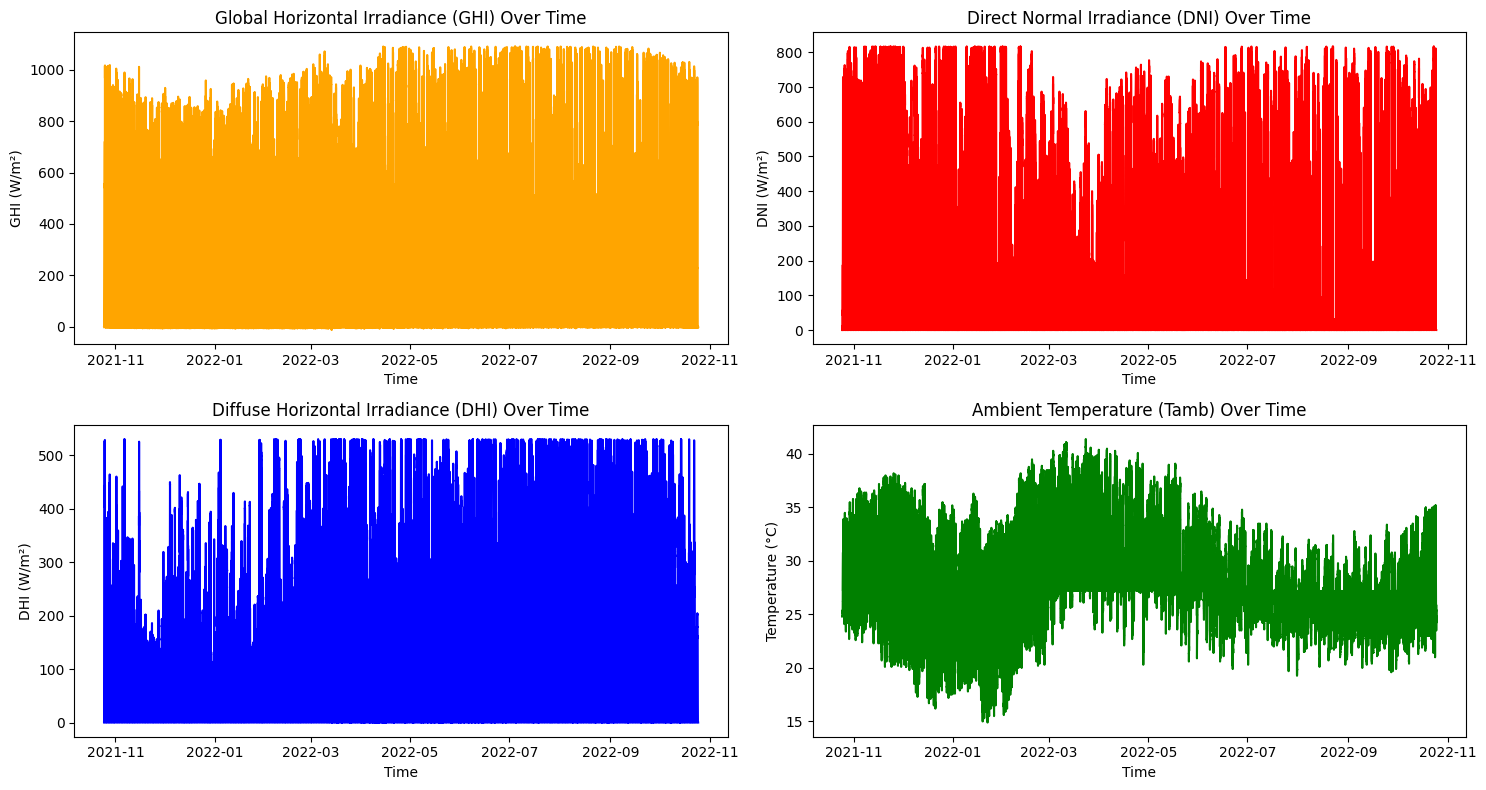

In [80]:
#Time Series Analysis
togo.plot_time_series()

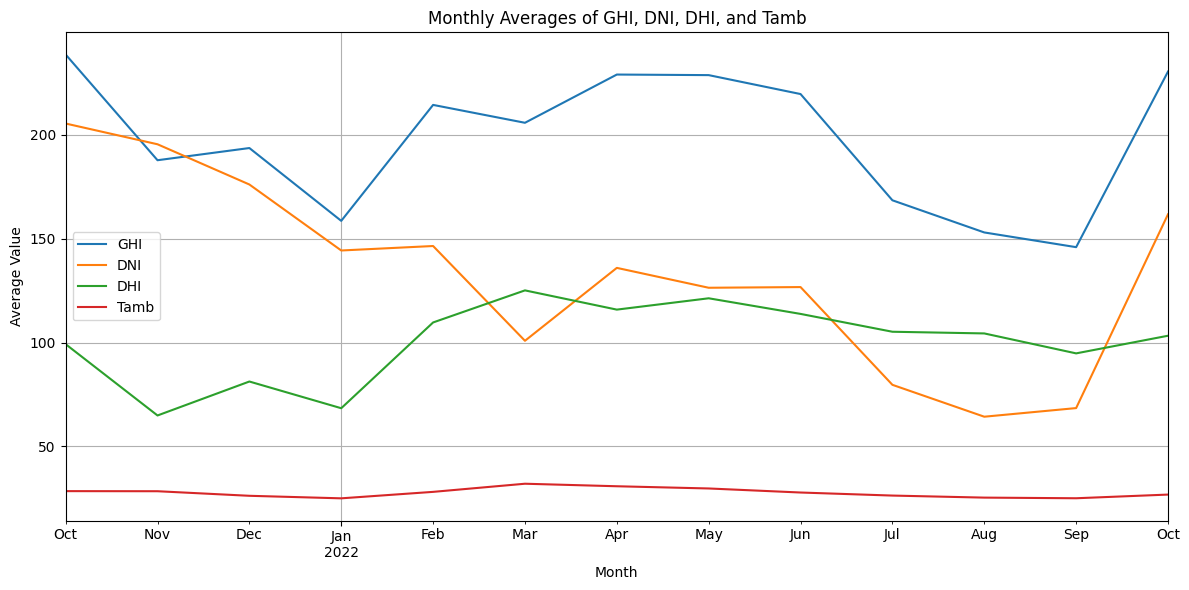

In [81]:
#montly trend analyisis
togo.plot_monthly_averages()

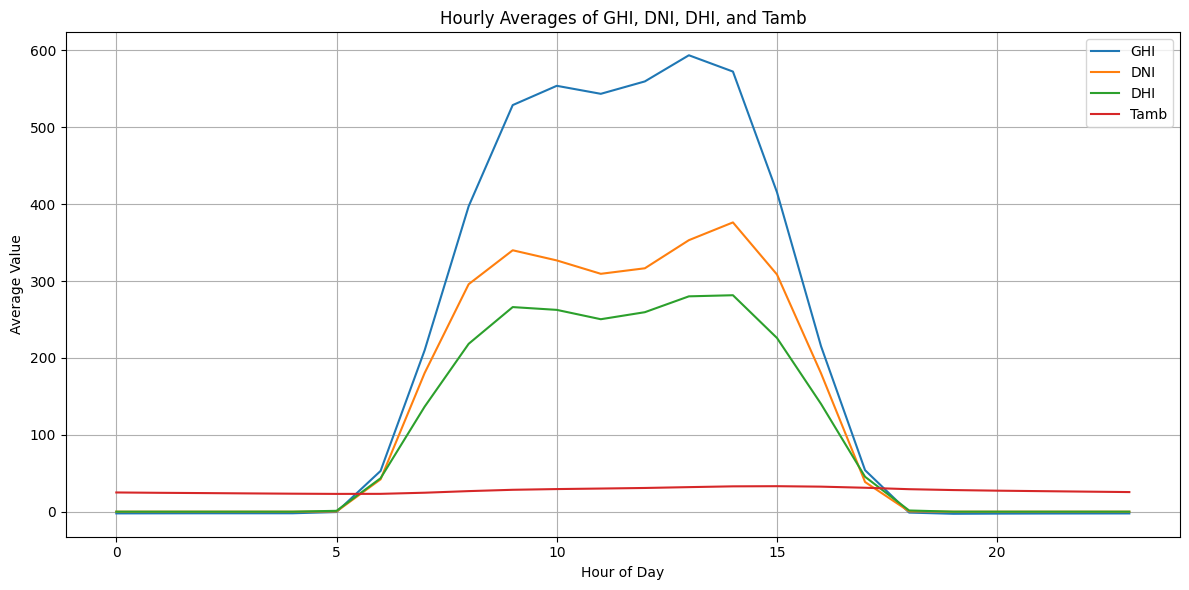

In [82]:
# hourly trend analysis for GHI, DNI and Tamb
togo.plot_hourly_averages()

=== Cleaning Impact on ModA and ModB ===
   Cleaning        ModA        ModB
0         0  190.025423  184.532684
1         1  436.354804  435.807117


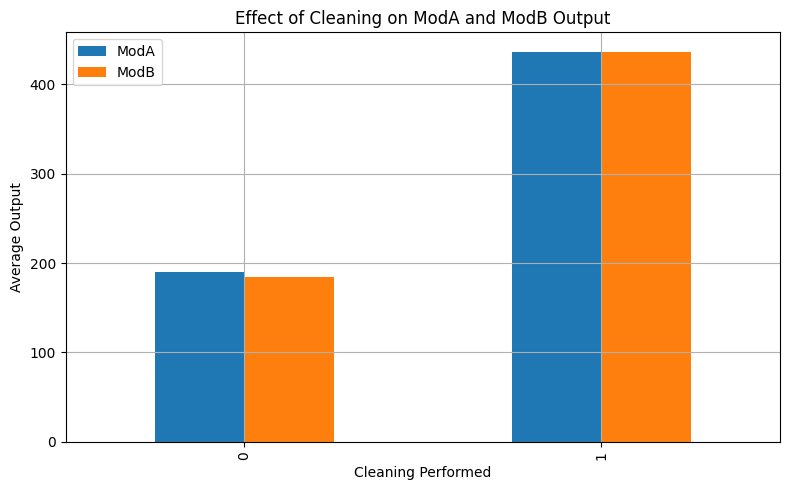

In [83]:
#Analyze how panel cleaning affects ModA and ModB performance
togo.analyze_cleaning_impact()

=== Wind Speed vs GHI Scatter Plots ===


c:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


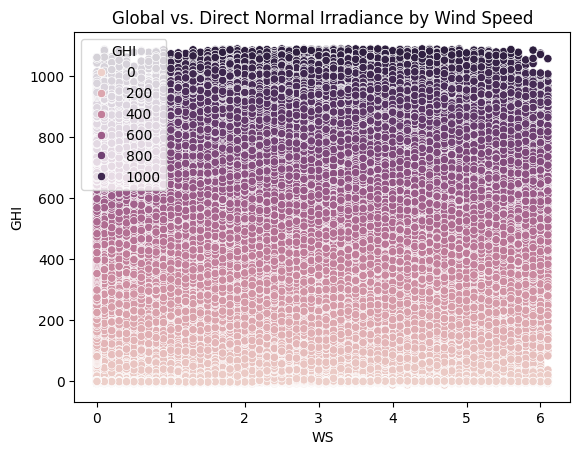

c:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


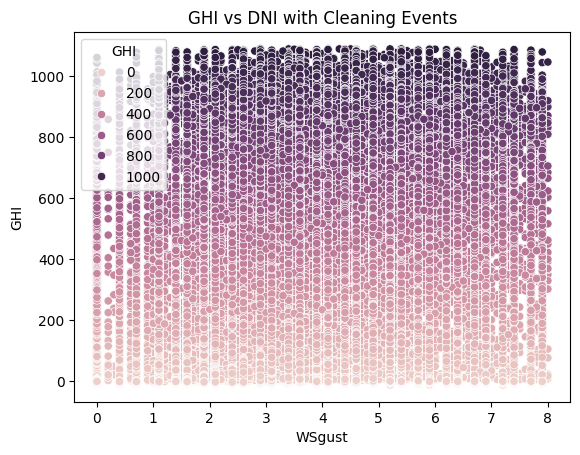

In [84]:
togo.scatter_plot()

=== Correlation Matrix Heatmap ===


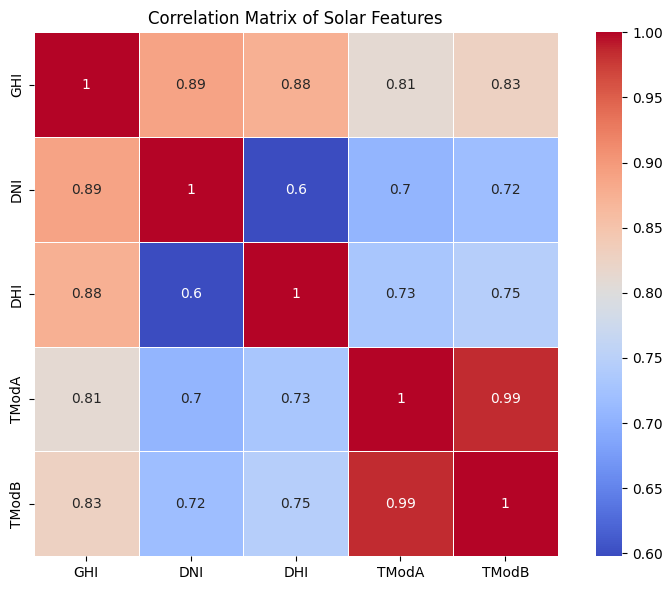

In [85]:
# Compute the correlation matrix for numeric columns and Visualize the heatmap
togo.plot_correlation_heatmap()

=== Wind & Distribution Analysis ===


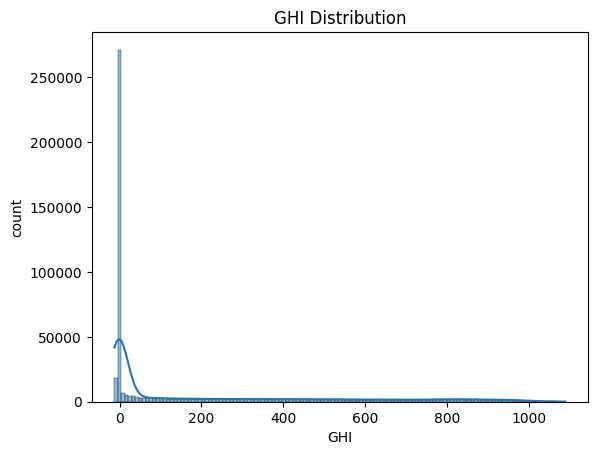

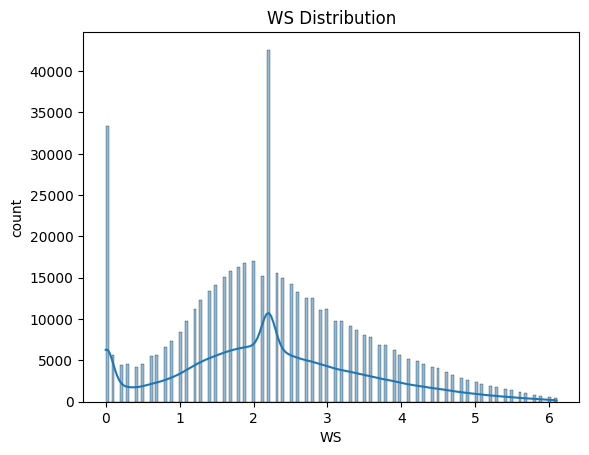

In [86]:
# Histograms for GHI and one other variable (e.g. WS).
togo.wind_and_distribution_analysis(["GHI", "WS"])

c:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


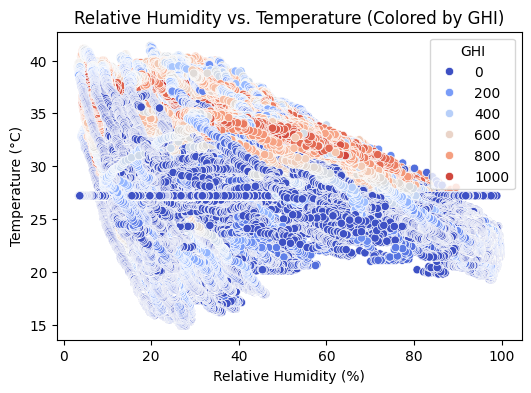

c:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


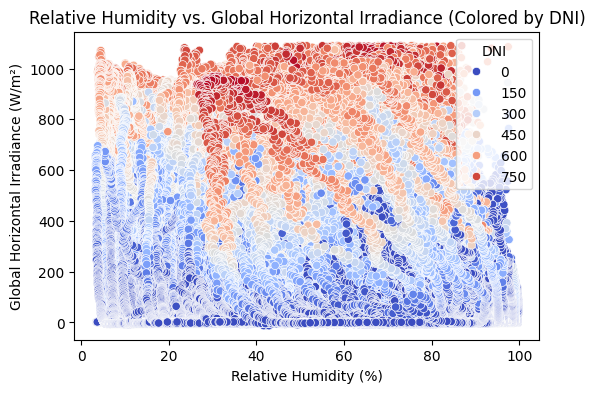

In [87]:
togo.tempature_analysis()

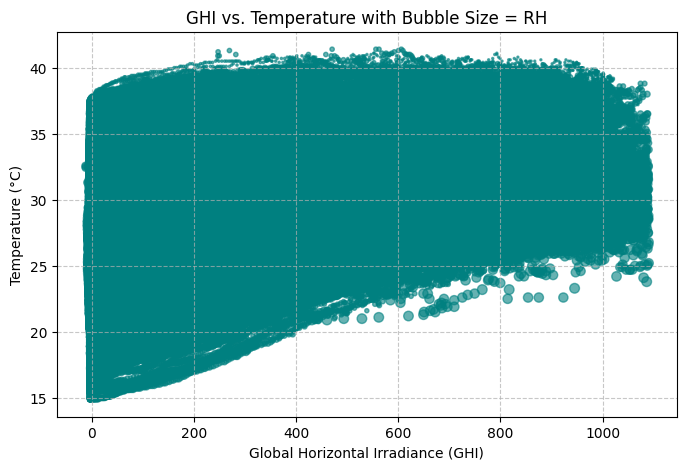

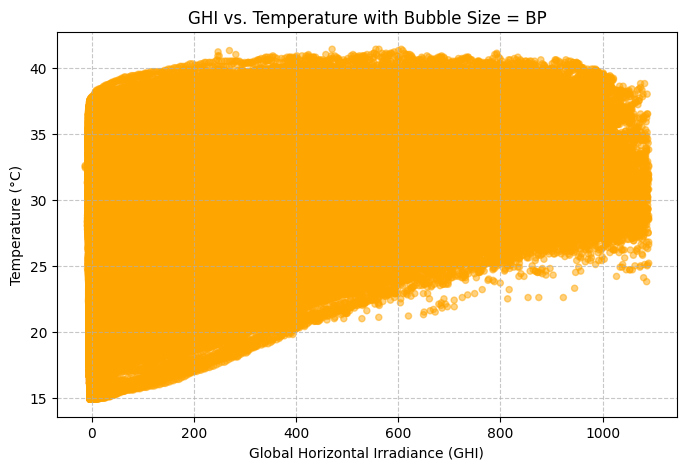

In [ ]:
# Generate a bubble charts to visualize the relationship between GHI vs. Tamb with bubble size = RH or BP.
togo.bubble_chart()